# Set shift detection pipeline

In [ ]:
def checking_shift_pipeline(args):
	import os

    # Generate the shift prefix
	shift_pfx = str(args.plus_shift) + '_' + str(abs(args.minus_shift))

	if args.file_prefix:
		fpx = args.file_prefix+"_"+shift_pfx+'_'
	else:
		fpx = ""+'_'+shift_pfx+'_'
	
    # Shift bam and convert to bigwig
	import chrombpnet.helpers.preprocessing.reads_to_bigwig as reads_to_bigwig
	args.output_prefix = os.path.join(args.output_dir,f"auxiliary/{fpx}data")
	reads_to_bigwig.main(args)
	
    # QC bigwig
	import chrombpnet.helpers.preprocessing.analysis.build_pwm_from_bigwig as build_pwm_from_bigwig
	args.bigwig = os.path.join(args.output_dir,"auxiliary/{}data_unstranded.bw".format(fpx))
	args.output_prefix = os.path.join(args.output_dir,"evaluation/{}bw_shift_qc".format(fpx))
	args.pwd_width = 24
	build_pwm_from_bigwig.main(args)


In [ ]:
import chrombpnet.helpers.hyperparameters.find_bias_hyperparams as find_bias_hyperparams

In [1]:
import argparse
import pyfaidx
import pyBigWig
import pandas as pd
import numpy as np
import os
import json
import chrombpnet.helpers.hyperparameters.param_utils as param_utils

In [2]:
bigwig = "/data/leslie/jiaxin/chrombpnet/bias_model_Feb_05/auxiliary/Dataset_6_lane_1_Feb_05_data_unstranded.bw"
bw = pyBigWig.open(bigwig) 

In [3]:
genome_file = "/data/leslie/jiaxin/chrombpnet_tutorial/data/downloads/hg38.fa"
genome = pyfaidx.Fasta(genome_file)

In [4]:
peaks = "/data/leslie/jiaxin/PANC/data/scatac_files/peaks_no_blacklist_Feb_06.bed"
in_peaks =  pd.read_csv(peaks,
                        sep='\t',
                        header=None,
                        names=["chr", "start", "end", "1", "2", "3", "4", "5", "6", "summit"])

In [5]:
nonpeaks_file = "/data/leslie/jiaxin/PANC/data/scatac_files/output_Feb_06_negatives.bed"
in_nonpeaks =  pd.read_csv(nonpeaks_file,
                           sep='\t',
                           header=None,
                           names=["chr", "start", "end", "1", "2", "3", "4", "5", "6", "summit"])

In [6]:
inputlen = 2114
outputlen = 1000

In [7]:
peak_cnts, _ = param_utils.get_seqs_cts(genome, bw, in_peaks, inputlen, outputlen)
nonpeak_cnts, _ = param_utils.get_seqs_cts(genome, bw, in_nonpeaks, inputlen, outputlen)    

In [9]:
df = pd.DataFrame(peak_cnts)

In [15]:
df.iloc[:, 0].value_counts()

0
0.0        52795
1.0        24160
2.0        17305
3.0        13321
4.0        10928
           ...  
3908.0         1
5457.0         1
6833.0         1
7968.0         1
19960.0        1
Name: count, Length: 5765, dtype: int64

In [16]:
df_1 = pd.DataFrame(nonpeak_cnts)

In [17]:
df_1.iloc[:, 0].value_counts()

0
0.0        126725
1.0         45070
2.0         31308
3.0         24352
4.0         20127
            ...  
5097.0          1
5485.0          1
12094.0         1
6667.0          1
4177.0          1
Name: count, Length: 5466, dtype: int64

In [30]:
peak_cnts.shape

(436017,)

In [31]:
data1 = np.array([1, 2, 3, 4, 5])
data1.shape

(5,)

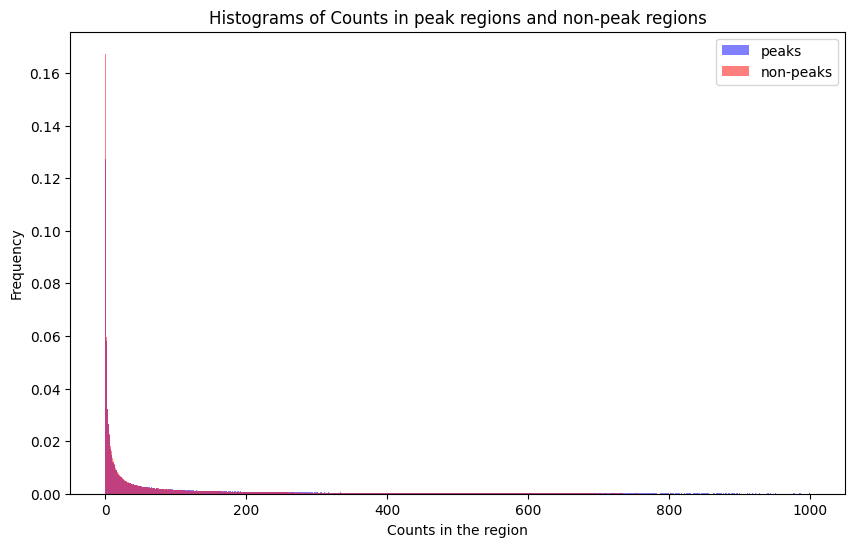

In [33]:
import matplotlib.pyplot as plt

# Sample data: two lists
data1 = peak_cnts
data2 = nonpeak_cnts

# data1 = [peak_cnts]
# data2 = [nonpeak_cnts]

# Define the range of x-axis
x_min = 0
x_max = 1000
bins_range = (x_min, x_max)

# Plotting
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.hist(data1, bins=1000, alpha=0.5, color='blue', range=bins_range, label='peaks', density = True)
plt.hist(data2, bins=1000, alpha=0.5, color='red', range=bins_range, label='non-peaks', density = True)

# Customizing the plot
plt.xlabel('Counts in the region')
plt.ylabel('Frequency')
plt.title('Histograms of Counts in peak regions and non-peak regions')
plt.legend()  # Show legend

# Show the plot
plt.show()

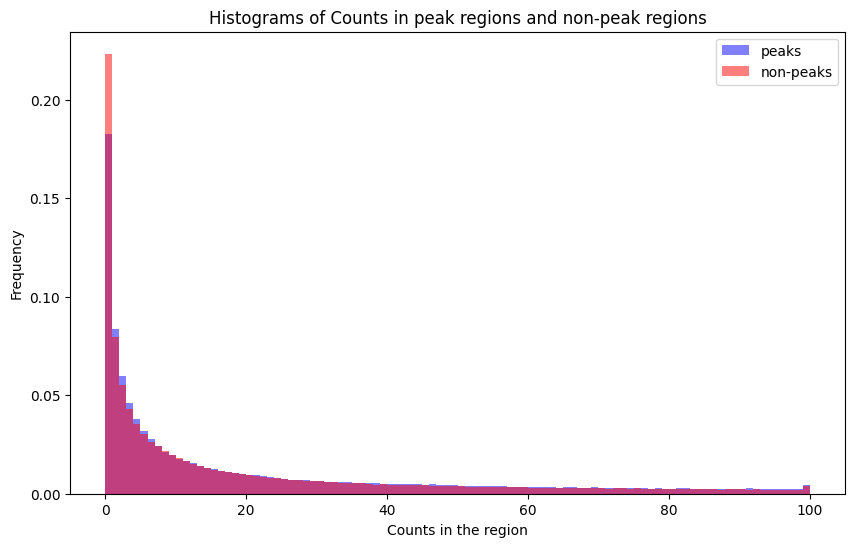

In [23]:
import matplotlib.pyplot as plt

# Sample data: two lists
data1 = [peak_cnts]
data2 = [nonpeak_cnts]

# Define the range of x-axis
x_min = 0
x_max = 100
bins_range = (x_min, x_max)

# Plotting
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.hist(data1, bins=100, alpha=0.5, color='blue', range=bins_range, label='peaks', density = True)
plt.hist(data2, bins=100, alpha=0.5, color='red', range=bins_range, label='non-peaks', density = True)

# Customizing the plot
plt.xlabel('Counts in the region')
plt.ylabel('Frequency')
plt.title('Histograms of Counts in peak regions and non-peak regions')
plt.legend()  # Show legend

# Show the plot
plt.show()

(0, 10000)


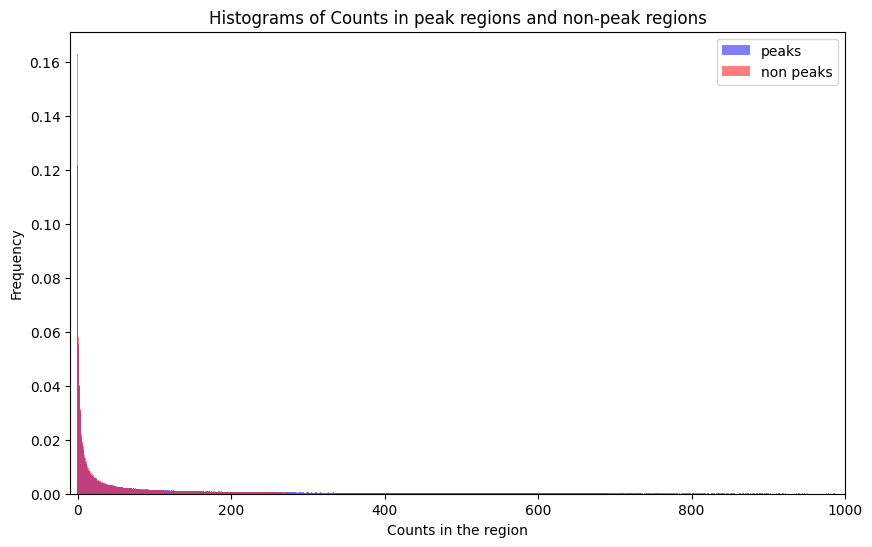

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: two lists
data1 = peak_cnts
data2 = nonpeak_cnts


# Determine the overall range of the data to cover all integers in both lists
# min_val = min(min(data1), min(data2))  # Find the minimum value
# max_val = max(max(data1), max(data2))  # Find the maximum value

min_val = 0
max_val = 10000

print((min_val, max_val))
# Create a list of bin edges from min_val-0.5 to max_val+0.5, so each integer has its own bin
bins = np.arange(min_val-0.5, max_val+1.5, 1)

# Plotting with proportions on the y-axis, considering all values
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.hist(data1, bins=bins, alpha=0.5, color='blue', density=True, label='peaks')
plt.hist(data2, bins=bins, alpha=0.5, color='red', density=True, label='non peaks')

# Manually set the x-axis limits if needed
plt.xlim(-10, 1000)  # Uncomment and set x_min and x_max if you want to limit the x-axis range

# Customizing the plot
plt.xlabel('Counts in the region')
plt.ylabel('Frequency')
plt.title('Histograms of Counts in peak regions and non-peak regions')
plt.legend()  # Show legend

plt.savefig('/data/leslie/jiaxin/chrombpnet/bias_model_Feb_05/evaluation/peak_count_distribution_0_1000.png')
# Show the plot
plt.show()

(0, 10000)


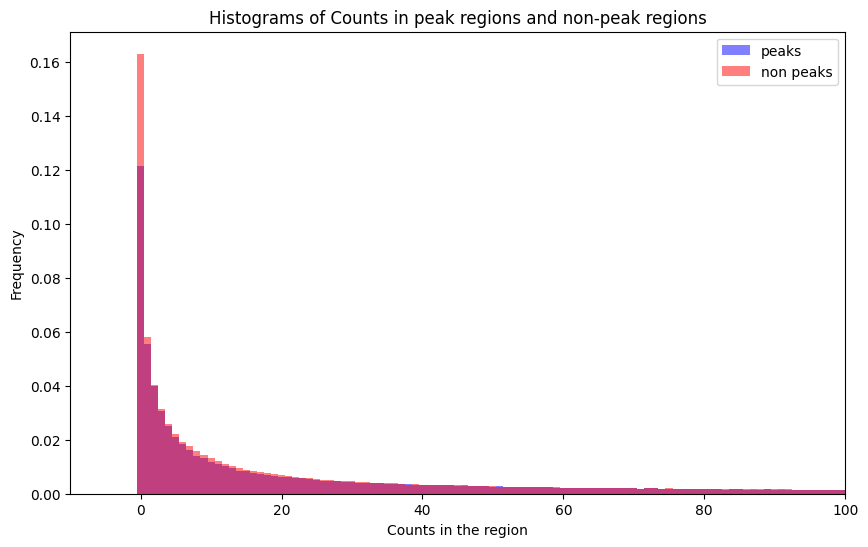

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: two lists
data1 = peak_cnts
data2 = nonpeak_cnts


# Determine the overall range of the data to cover all integers in both lists
# min_val = min(min(data1), min(data2))  # Find the minimum value
# max_val = max(max(data1), max(data2))  # Find the maximum value

min_val = 0
max_val = 10000

print((min_val, max_val))
# Create a list of bin edges from min_val-0.5 to max_val+0.5, so each integer has its own bin
bins = np.arange(min_val-0.5, max_val+1.5, 1)

# Plotting with proportions on the y-axis, considering all values
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.hist(data1, bins=bins, alpha=0.5, color='blue', density=True, label='peaks')
plt.hist(data2, bins=bins, alpha=0.5, color='red', density=True, label='non peaks')

# Manually set the x-axis limits if needed
plt.xlim(-10, 100)  # Uncomment and set x_min and x_max if you want to limit the x-axis range

# Customizing the plot
plt.xlabel('Counts in the region')
plt.ylabel('Frequency')
plt.title('Histograms of Counts in peak regions and non-peak regions')
plt.legend()  # Show legend

plt.savefig('/data/leslie/jiaxin/chrombpnet/bias_model_Feb_05/evaluation/peak_count_distribution_0_100.png')
# Show the plot
plt.show()

(0, 10000)


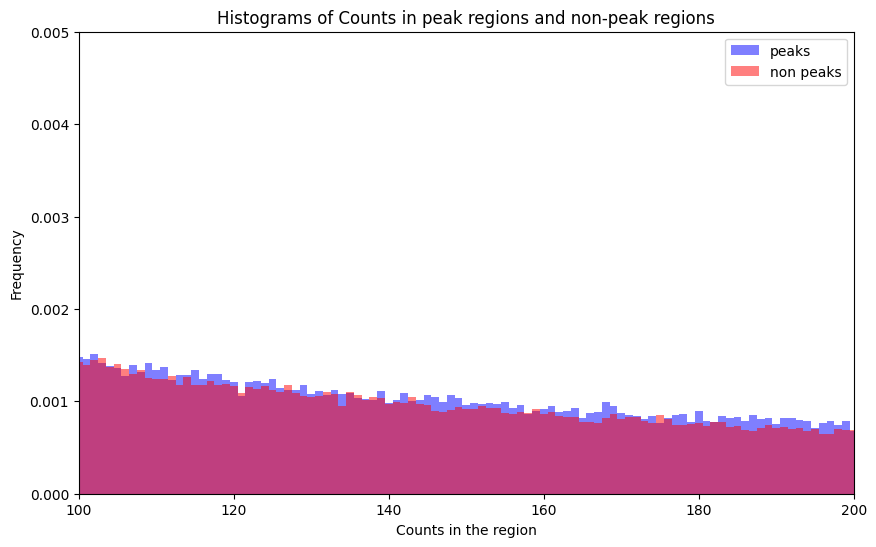

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: two lists
data1 = peak_cnts
data2 = nonpeak_cnts


# Determine the overall range of the data to cover all integers in both lists
# min_val = min(min(data1), min(data2))  # Find the minimum value
# max_val = max(max(data1), max(data2))  # Find the maximum value

min_val = 0
max_val = 10000

print((min_val, max_val))
# Create a list of bin edges from min_val-0.5 to max_val+0.5, so each integer has its own bin
bins = np.arange(min_val-0.5, max_val+1.5, 1)

# Plotting with proportions on the y-axis, considering all values
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.hist(data1, bins=bins, alpha=0.5, color='blue', density=True, label='peaks')
plt.hist(data2, bins=bins, alpha=0.5, color='red', density=True, label='non peaks')

# Manually set the x-axis limits if needed
plt.xlim(100, 200)  # Uncomment and set x_min and x_max if you want to limit the x-axis range
plt.ylim(0, 0.005)
# Customizing the plot
plt.xlabel('Counts in the region')
plt.ylabel('Frequency')
plt.title('Histograms of Counts in peak regions and non-peak regions')
plt.legend()  # Show legend

plt.savefig('/data/leslie/jiaxin/chrombpnet/bias_model_Feb_05/evaluation/peak_count_distribution_100_200.png')
# Show the plot
plt.show()

(0, 10000)


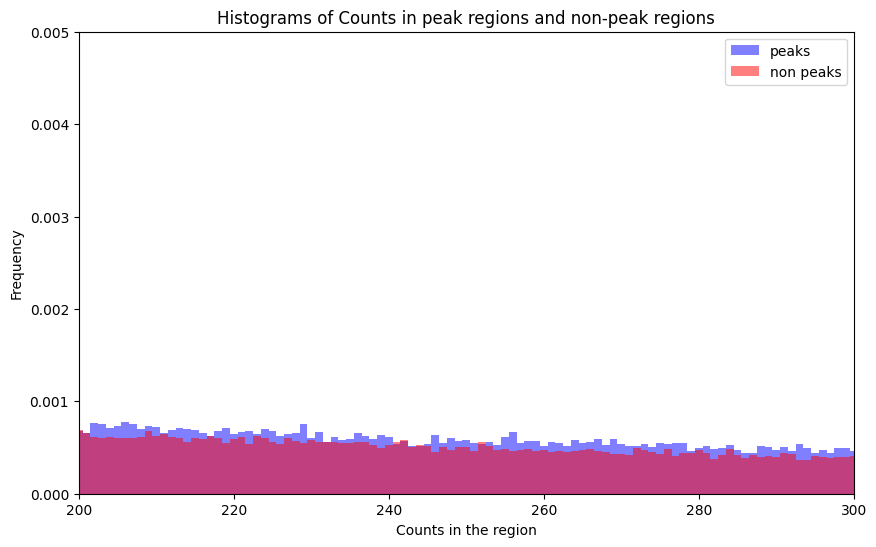

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: two lists
data1 = peak_cnts
data2 = nonpeak_cnts


# Determine the overall range of the data to cover all integers in both lists
# min_val = min(min(data1), min(data2))  # Find the minimum value
# max_val = max(max(data1), max(data2))  # Find the maximum value

min_val = 0
max_val = 10000

print((min_val, max_val))
# Create a list of bin edges from min_val-0.5 to max_val+0.5, so each integer has its own bin
bins = np.arange(min_val-0.5, max_val+1.5, 1)

# Plotting with proportions on the y-axis, considering all values
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.hist(data1, bins=bins, alpha=0.5, color='blue', density=True, label='peaks')
plt.hist(data2, bins=bins, alpha=0.5, color='red', density=True, label='non peaks')

# Manually set the x-axis limits if needed
plt.xlim(200, 300)  # Uncomment and set x_min and x_max if you want to limit the x-axis range
plt.ylim(0, 0.005)
# Customizing the plot
plt.xlabel('Counts in the region')
plt.ylabel('Frequency')
plt.title('Histograms of Counts in peak regions and non-peak regions')
plt.legend()  # Show legend

plt.savefig('/data/leslie/jiaxin/chrombpnet/bias_model_Feb_05/evaluation/peak_count_distribution_200_300.png')
# Show the plot
plt.show()

In [55]:
np.quantile(peak_cnts,0.30)

6.0

In [56]:
sum(nonpeak_cnts < 6)

264905

In [39]:
peak_cnts.max()

3736963.0

In [40]:
nonpeak_cnts.max()

18833816.0